# **Setup**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# print(keras.__version__)

2.14.0
Num GPUs Available:  0


In [3]:
!python --version

from psutil import *
print("CPU Core Count: ",cpu_count())
print(f'CPU Frequeny: {cpu_freq()}')
print(f'System Memory: {virtual_memory()[0]/(1024**3):.0f} GB')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Python 3.11.6
CPU Core Count:  16
CPU Frequeny: scpufreq(current=2200.0, min=0.0, max=2200.0)
System Memory: 16 GB
Num GPUs Available:  0


# **Data Import**

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

# Split Data
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
type(x_train)

numpy.ndarray

In [6]:
# Change Pixel Intensities From [0,255] To [0,1]
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# Train Data Size
print(x_train.shape)

(60000, 28, 28)


# **Data Exploration & Preparation**

In [8]:
# Check Training Data
print(x_train[0],'\n')
print(y_train[0])
print(class_names[y_train[0]])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

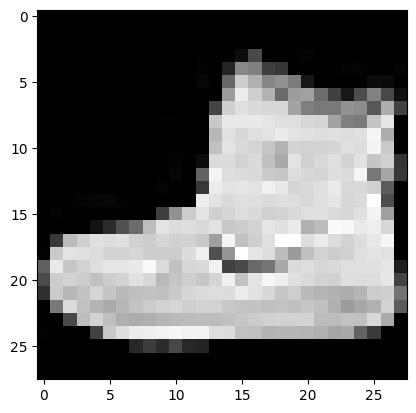

In [9]:
# Print Training Data As Grayscale Image
plt.imshow(x_train[0], cmap='gray')
plt.show()

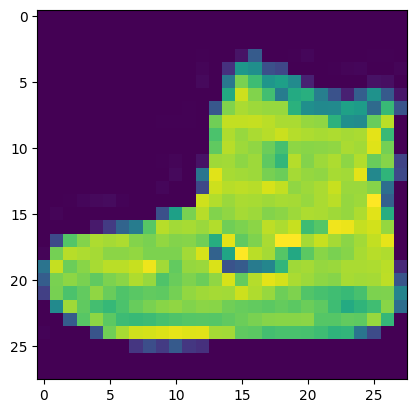

In [10]:
# Print Training Data As Colour Image
plt.imshow(x_train[0])
plt.show()

# **Model - ADAM Optimizer**

In [11]:
# Build A MLP Classifier Using Keras Sequential Model
model11 = keras.models.Sequential()

# Add Neural Network Layers
model11.add(keras.layers.Flatten(input_shape=[28,28]))
model11.add(keras.layers.Dense(600,activation='relu'))
model11.add(keras.layers.Dense(200,activation='relu'))
model11.add(keras.layers.Dense(10,activation='softmax'))
model11.summary()

# Use Keras SGD Optimizer & LR = 0.00001 Instead Of Regular SGD
model11.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),metrics=['accuracy'])
model11.fit(x_train,y_train,epochs=30,validation_split=0.1)

print('\n','\n')
model11.evaluate(x_test,y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 600)               471000    
                                                                 
 dense_1 (Dense)             (None, 200)               120200    
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 593210 (2.26 MB)
Trainable params: 593210 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4770 - accuracy: 0.8271 - val_loss: 0.3903 - val_accuracy: 0.8507
Epoch 2

[0.4977553188800812, 0.8889999985694885]

In [12]:
# Python 3.10 | Tensorflow 2.10 | Intel Iris GPU:
# Processing Time: 12.33 Min 
# Output: [0.488474041223526, 0.8920000195503235]

# Python 3.11 | Tensorflow 2.14 | Intel Iris CPU:
# Processing Time: 05.42 Min 
# Output: [0.5180577635765076, 0.8883000016212463]